In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
uber = pd.read_excel(r"C:\Users\Acer-\Downloads\Uber Data Analysis Project\UberDataset_clean.xlsx")
uber

,START_DATE,START_TIME,END_DATE,END_TIME,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01,21:11:00,2016-01-01,21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,01:25:00,2016-01-02,01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,2016-01-02,20:25:00,2016-01-02,20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,2016-01-05,17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,2016-01-06,15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...,...,...
1149,2016-12-31,01:07:00,2016-12-31,01:14:00,Business,Karachi,Karachi,0.7,Meeting
1150,2016-12-31,13:24:00,2016-12-31,13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site
1151,2016-12-31,15:03:00,2016-12-31,15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1152,2016-12-31,21:32:00,2016-12-31,21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1154 non-null   datetime64[ns]
 1   START_TIME  1154 non-null   object        
 2   END_DATE    1154 non-null   datetime64[ns]
 3   END_TIME    1154 non-null   object        
 4   CATEGORY    1154 non-null   object        
 5   START       1154 non-null   object        
 6   STOP        1154 non-null   object        
 7   MILES       1154 non-null   float64       
 8   PURPOSE     1154 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 81.3+ KB


In [4]:
uber.describe()

,START_DATE,END_DATE,MILES
count,1154,1154,1154.000000
mean,2016-07-16 08:56:34.107452416,2016-07-16 09:14:02.287694848,10.567418
min,2016-01-01 00:00:00,2016-01-01 00:00:00,0.500000
25%,2016-03-31 06:00:00,2016-03-31 06:00:00,2.900000
50%,2016-07-21 00:00:00,2016-07-21 00:00:00,6.000000
75%,2016-10-27 00:00:00,2016-10-27 00:00:00,10.400000
max,2016-12-31 00:00:00,2016-12-31 00:00:00,310.300000
std,NaN,NaN,21.588452


In [5]:
#Convert DATE and TIME column
uber['START_TIME_DT'] = pd.to_datetime(uber['START_TIME'], format='%H:%M:%S')
uber['START_TIME'] = uber['START_TIME_DT'].dt.time
uber = uber.drop('START_TIME_DT', axis=1)
uber['END_TIME_DT'] = pd.to_datetime(uber['END_TIME'], format='%H:%M:%S')
uber['END_TIME'] = uber['END_TIME_DT'].dt.time
uber = uber.drop('END_TIME_DT', axis=1)

uber

,START_DATE,START_TIME,END_DATE,END_TIME,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01,21:11:00,2016-01-01,21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,01:25:00,2016-01-02,01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,2016-01-02,20:25:00,2016-01-02,20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,2016-01-05,17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,2016-01-06,15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...,...,...
1149,2016-12-31,01:07:00,2016-12-31,01:14:00,Business,Karachi,Karachi,0.7,Meeting
1150,2016-12-31,13:24:00,2016-12-31,13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site
1151,2016-12-31,15:03:00,2016-12-31,15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1152,2016-12-31,21:32:00,2016-12-31,21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [6]:
#Extract Start/End Hour of the trip
uber['Start_Hour'] = uber['START_TIME'].apply(lambda x: x.hour)
uber['END_Hour'] = uber['END_TIME'].apply(lambda x: x.hour)

uber

,START_DATE,START_TIME,END_DATE,END_TIME,CATEGORY,START,STOP,MILES,PURPOSE,Start_Hour,END_Hour
0,2016-01-01,21:11:00,2016-01-01,21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,21
1,2016-01-02,01:25:00,2016-01-02,01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,1
2,2016-01-02,20:25:00,2016-01-02,20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,20
3,2016-01-05,17:31:00,2016-01-05,17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,17
4,2016-01-06,14:42:00,2016-01-06,15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,15
...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-31,01:07:00,2016-12-31,01:14:00,Business,Karachi,Karachi,0.7,Meeting,1,1
1150,2016-12-31,13:24:00,2016-12-31,13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,13,13
1151,2016-12-31,15:03:00,2016-12-31,15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,15
1152,2016-12-31,21:32:00,2016-12-31,21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,21


In [7]:
#Extract Month Data
uber['START_DATE'] = pd.to_datetime(uber['START_DATE'])
uber['END_DATE'] = pd.to_datetime(uber['END_DATE'])
uber['Month'] = uber['START_DATE'].dt.month_name()

uber

,START_DATE,START_TIME,END_DATE,END_TIME,CATEGORY,START,STOP,MILES,PURPOSE,Start_Hour,END_Hour,Month
0,2016-01-01,21:11:00,2016-01-01,21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,21,January
1,2016-01-02,01:25:00,2016-01-02,01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,1,January
2,2016-01-02,20:25:00,2016-01-02,20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,20,January
3,2016-01-05,17:31:00,2016-01-05,17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,17,January
4,2016-01-06,14:42:00,2016-01-06,15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,15,January
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-31,01:07:00,2016-12-31,01:14:00,Business,Karachi,Karachi,0.7,Meeting,1,1,December
1150,2016-12-31,13:24:00,2016-12-31,13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,13,13,December
1151,2016-12-31,15:03:00,2016-12-31,15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,15,December
1152,2016-12-31,21:32:00,2016-12-31,21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,21,December


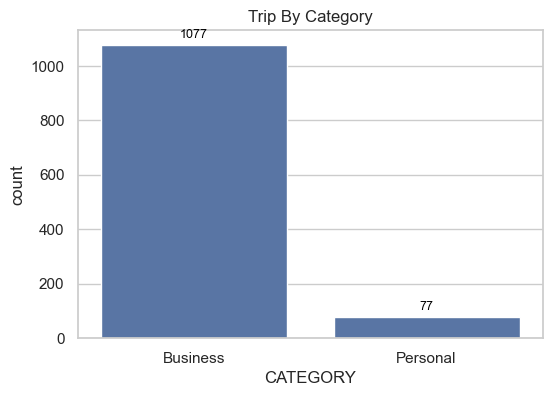

In [8]:
#Plot trip count by category
plt.figure(figsize=(6, 4))
cx = sns.countplot(data=uber, x='CATEGORY')
plt.title('Trip By Category')
for c in cx.patches:
    height = c.get_height()
    cx.annotate(f'{int(height)}', 
                (c.get_x() + c.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=9, color='black', 
                xytext=(0, 3), textcoords='offset points')
plt.show()

In [9]:
#List Top 10 purpose
top_purposes = uber['PURPOSE'].value_counts().head(10).index
x=0
for i in top_purposes:
    x +=1
    print(str(x)+'. '+i)

1. Unknown
2. Meeting
3. Meal/Entertain
4. Errand/Supplies
5. Customer Visit
6. Temporary Site
7. Between Offices
8. Moving
9. Airport/Travel
10. Charity


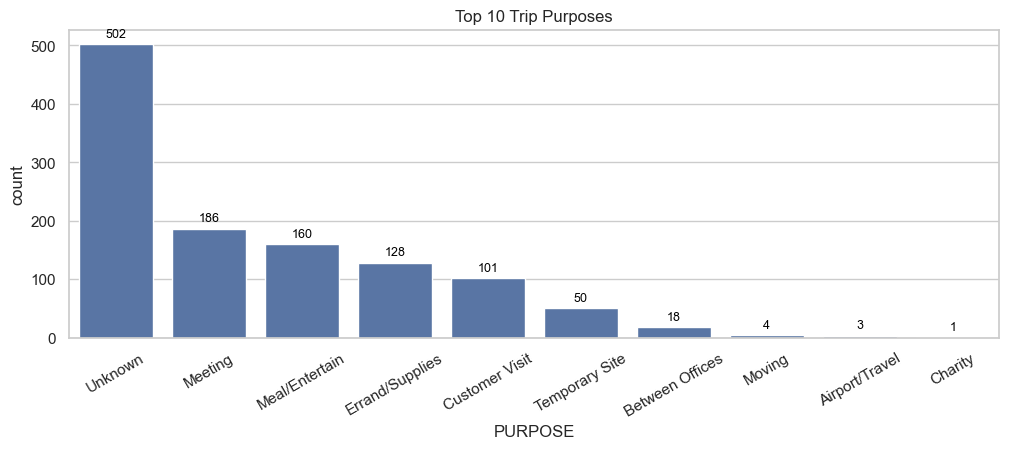

In [10]:
#Plot Top 10 trip count by purpose
plt.figure(figsize=(12, 4))

top_purposes = uber['PURPOSE'].value_counts().head(10).index

ax = sns.countplot(data=uber[uber['PURPOSE'].isin(top_purposes)], x='PURPOSE', order=top_purposes)

plt.xticks(rotation=30)

plt.title("Top 10 Trip Purposes")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=9, color='black',
                xytext=(0, 3), textcoords='offset points')

plt.show()

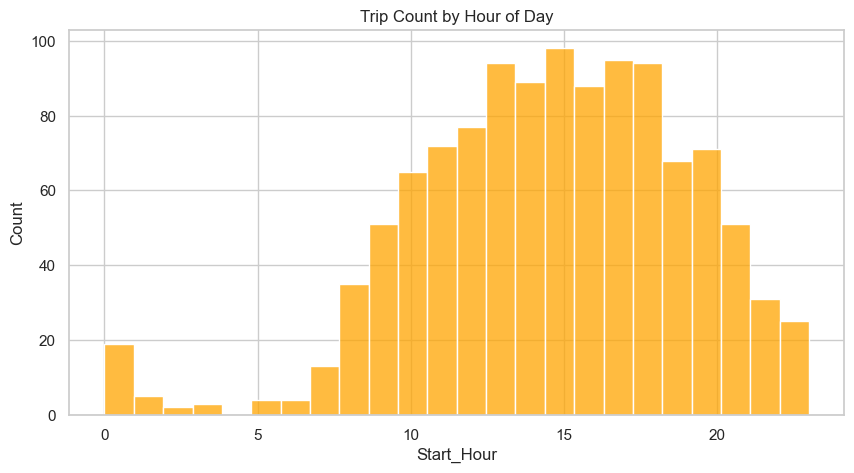

In [11]:
#Plot Trip Count by Hour of Day
plt.figure(figsize=(10, 5))
sns.histplot(data=uber, x='Start_Hour', bins=24, kde=False, color='orange')
plt.title("Trip Count by Hour of Day")
plt.show()

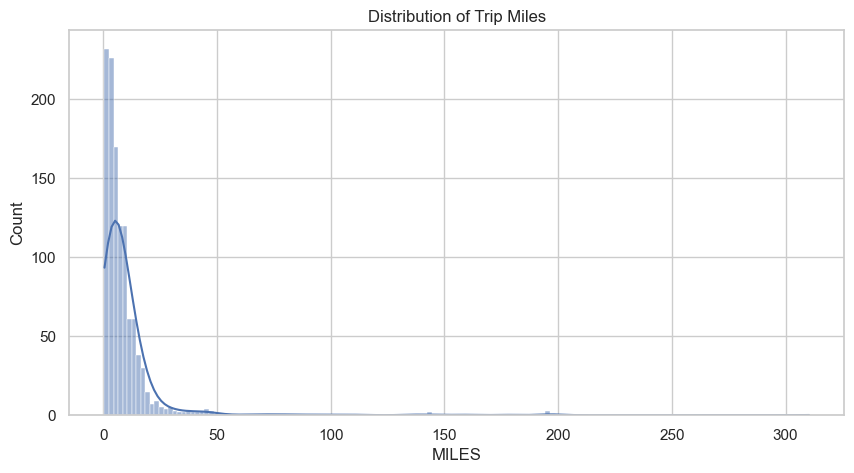

In [12]:
# Distribution of Miles
plt.figure(figsize=(10, 5))
sns.histplot(data=uber, x='MILES', binwidth=2, kde=True)
plt.title("Distribution of Trip Miles")
plt.show()

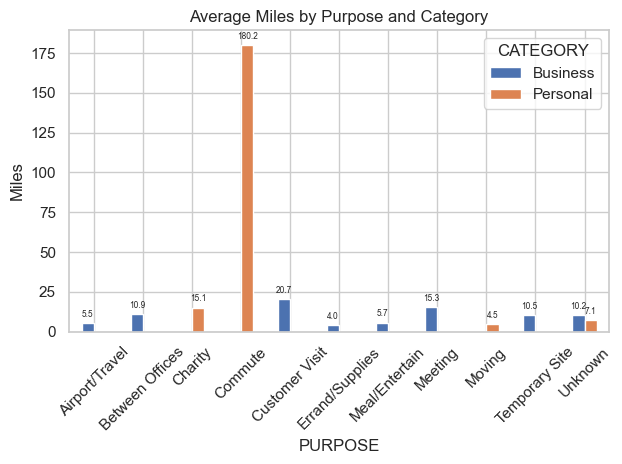

In [13]:
#Plot Average Miles by Purpose and Category
avg_miles = uber.groupby(['CATEGORY', 'PURPOSE'])['MILES'].mean().unstack().fillna(0)
ax = avg_miles.T.plot(kind='bar', stacked=False)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=6)

plt.title("Average Miles by Purpose and Category")
plt.ylabel("Miles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()